In [ ]:
Finding Missing Values

Objectives:

Identify missing values in the dataset.

Quantify missing values for specific columns.

Impute missing values using various strategies.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
1. Load the Dataset


In [4]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
2. Explore the Dataset
Task 1: Display basic information and summary statistics of the dataset.

In [5]:
#  Display basic information about the dataset
print("Basic Information about the Dataset:\n")
df.info()



Basic Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [6]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())


Summary Statistics for Numerical Columns:

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.0000

In [ ]:
3. Finding Missing Values
Task 2: Identify missing values for all columns.


In [7]:
# Identify missing values for all columns
missing_values = df.isnull().sum()

# Display columns with missing values only (optional for clarity)
missing_values_filtered = missing_values[missing_values > 0]

# Print missing values
print("Missing values per column:\n")
print(missing_values_filtered)


Missing values per column:

RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


In [ ]:
Task 3: Visualize missing values using a heatmap (Using seaborn library).

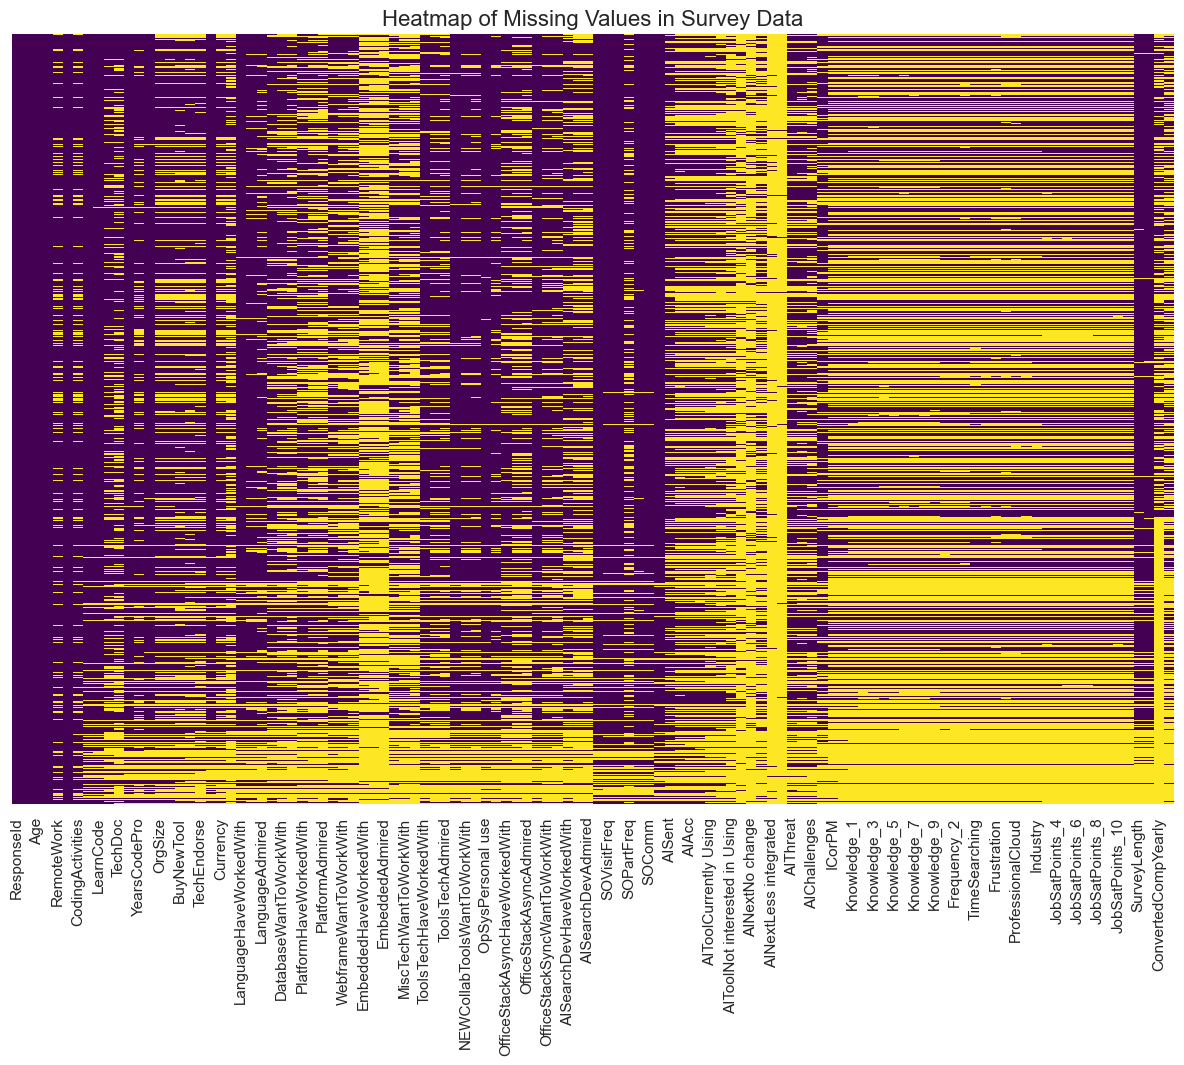

In [8]:
# Step 1: Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Set plot style (optional, for nicer plots)
sns.set(style="whitegrid")

# Step 3: Plot the heatmap
plt.figure(figsize=(15, 10))  # adjust size as needed
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Step 4: Add title and show plot
plt.title("Heatmap of Missing Values in Survey Data", fontsize=16)
plt.show()

In [ ]:
Task 4: Count the number of missing rows for a specific column (e.g., Employment).

In [9]:
# Count the number of missing rows in the 'Employment' column
missing_employment = df['Employment'].isnull().sum()

# Display the result
print(f"Number of missing rows in 'Employment': {missing_employment}")


Number of missing rows in 'Employment': 0


In [ ]:
4. Imputing Missing Values
Task 5: Identify the most frequent (majority) value in a specific column (e.g., Employment).

In [10]:
# Task 5: Identify the most frequent (majority) value in 'Employment' column
most_frequent_employment = df['Employment'].mode()[0]

# Display the result
print(f"Most frequent (majority) value in 'Employment': {most_frequent_employment}")


Most frequent (majority) value in 'Employment': Employed, full-time


In [ ]:
Task 6: Impute missing values in the Employment column with the most frequent value.


In [11]:
# Step 1: Identify the most frequent (majority) value in 'Employment'
most_frequent_employment = df['Employment'].mode()[0]
print(f"Most frequent value in 'Employment': {most_frequent_employment}")

# Step 2: Impute missing values in 'Employment' with the most frequent value
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Step 3: Verify that there are no missing values left in 'Employment'
missing_employment_after = df['Employment'].isnull().sum()
print(f"Missing values in 'Employment' after imputation: {missing_employment_after}")


Most frequent value in 'Employment': Employed, full-time
Missing values in 'Employment' after imputation: 0


In [ ]:
5. Visualizing Imputed Data
Task 7: Visualize the distribution of a column after imputation (e.g., Employment).


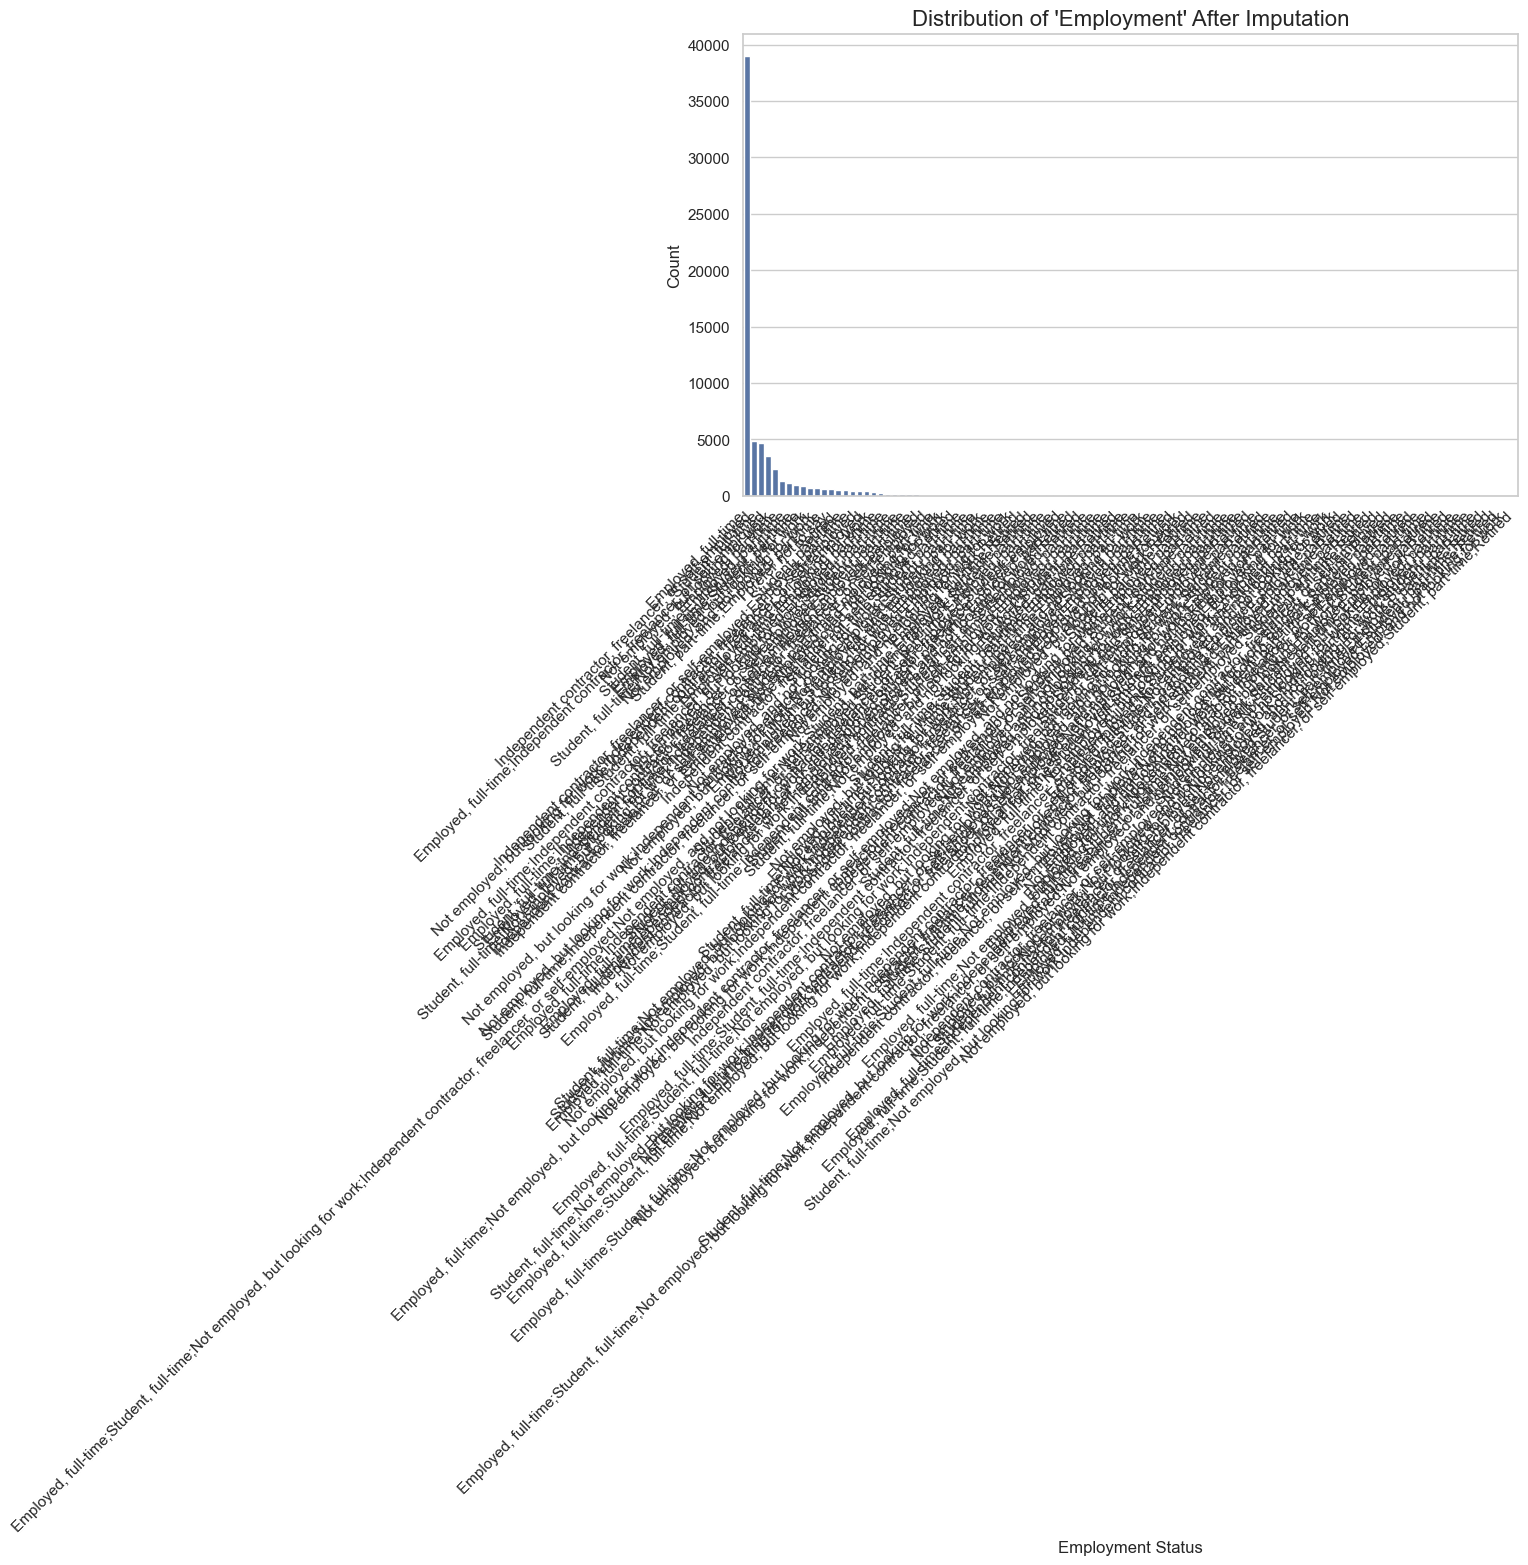

In [22]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style (optional)
sns.set(style="whitegrid")

# Plot the distribution of 'Employment' after imputation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)

# Add title and labels
plt.title("Distribution of 'Employment' After Imputation", fontsize=16)
plt.xlabel("Employment Status")
plt.ylabel("Count")

# Rotate x-axis labels if needed (for readability)
plt.xticks(rotation=45, ha='right')  # ha='right' aligns labels for better readability

# Show plot
plt.show()
